In [6]:
# --
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.14.1
#   kernelspec:
#     display_name: Python 3 (ipykernel)
#     language: python
#     name: python3
# ---

In [7]:
from collections.abc import Iterator
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from itertools import cycle
import statsmodels.api as sm

np.random.seed(42)

cycol: Iterator = cycle("bgrcmykw")

```
for i in range polynom_degree:
    generate X (i poly features for x)
    check condition number
    calculate:
          X^*
          w = X^* * y
          y_pred = X * w

    calculate metrics:
        adjusted coefficient of determination

        predictions variance
        bias^2


    plot:
        (x, y_pred), (x, y)

plot/print metrics
```

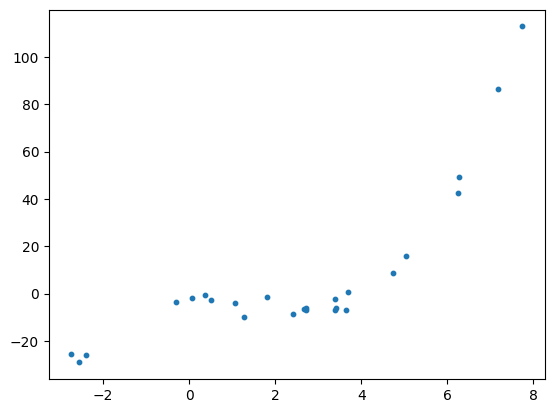

In [8]:

n_dots: int = 25
x: np.ndarray = 2 - 3 * np.random.normal(0, 1, n_dots)
y: np.ndarray = x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3, 3, n_dots)

# outliers
# outliers_x = np.array([1, 3, 4])
# outliers_y = np.array([-30, 20, 40])
# x = np.concatenate((x, outliers_x))
# y = np.concatenate((y, outliers_y))

# transform to vector [rows, columns (new axis from every column)]
x: np.ndarray = x[:, np.newaxis]
y: np.ndarray = y[:, np.newaxis]

plt.scatter(x, y, s=10)
plt.show()

         polynomial degree: 1,
         condition_number:  5.18,
         var_y_hat:         672.24,
         sqared_bias:       -1344.48,
         SSE:               380.43,
         R2:                0.64,
         adj. R2:           0.98357279

         polynomial degree: 2,
         condition_number:  29.80,
         var_y_hat:         899.74,
         sqared_bias:       -1799.47,
         SSE:               152.93,
         R2:                0.85,
         adj. R2:           0.98616361

         polynomial degree: 3,
         condition_number:  286.36,
         var_y_hat:         1045.93,
         sqared_bias:       -2091.86,
         SSE:               6.74,
         R2:                0.99,
         adj. R2:           0.99903907

         polynomial degree: 4,
         condition_number:  2602.47,
         var_y_hat:         1046.12,
         sqared_bias:       -2092.24,
         SSE:               6.55,
         R2:                0.99,
         adj. R2:           0.99869021



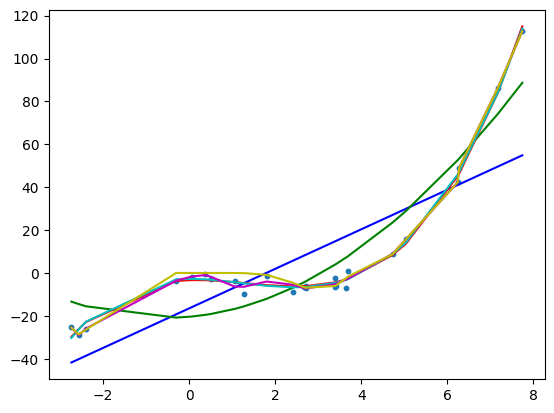

In [9]:
degrees: list[int] = [1, 2, 3, 4, 15, 20]
models_residuals: list[np.ndarray] = []

for degree in degrees:
    # generate X (i poly features for x)
    polynomial_features: PolynomialFeatures = PolynomialFeatures(degree=degree)
    X: np.ndarray = polynomial_features.fit_transform(x)

    # check condition number
    condition_number = np.linalg.cond(X)

    # X^*
    try:
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
        X_pseudo_inverse: np.ndarray = np.linalg.pinv(X)
    except LinAlgError as e:
        print(f'SVD computation does not converge for {str(X)}')
        raise e

    # w = X^* * y
    w: np.ndarray = X_pseudo_inverse @ y
    # y_pred = X * w
    y_hat: np.ndarray = X @ w

    # store residuals
    models_residuals.append(np.squeeze(y - y_hat))

    # metrics
    # adjusted coefficient of determination
    r2: np.float64 = np.float64(r2_score(y, y_hat))
    adj_r2: np.float64 = \
        1 - (1 - r2) * ((degree + 1) - 1) / \
        (y_hat.shape[0] - (degree + 1) - 1)

    # predictions variance
    var_y_hat: np.float64 = np.var(y_hat)

    # bias^2 = SSE - var(y_hat) - var(y)
    SSE: np.float64 = np.mean((y - y_hat) ** 2)
    sqared_bias: np.float64 = SSE - var_y_hat - np.var(y)

    print(f' \
        polynomial degree: {degree},\n \
        condition_number:  {condition_number:.2f},\n \
        var_y_hat:         {var_y_hat:.2f},\n \
        sqared_bias:       {sqared_bias:.2f},\n \
        SSE:               {SSE:.2f},\n \
        R2:                {r2:.2f},\n \
        adj. R2:           {adj_r2:.8f}\n')

    # plot
    # sort the values of x before line plot
    data: np.ndarray = np.concatenate([x, y_hat], axis=1)
    data = data[np.argsort(data[:, 0], axis=0), :]

    plt.plot(data[:, 0], data[:, 1], color=next(cycol), label=f'degree: {degree}')


plt.scatter(x, y, s=10, label='data')
plt.show()

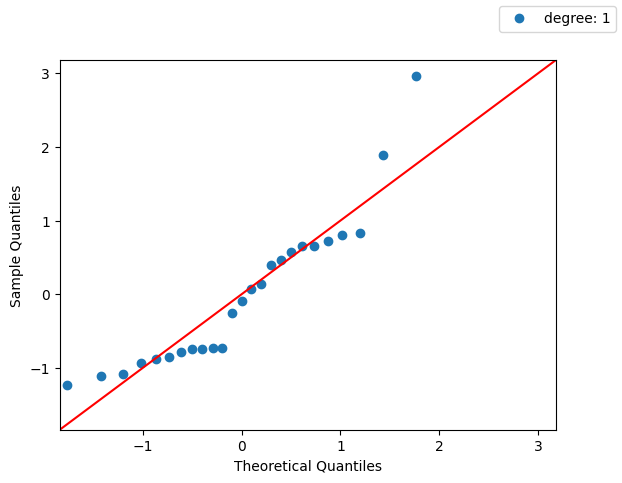

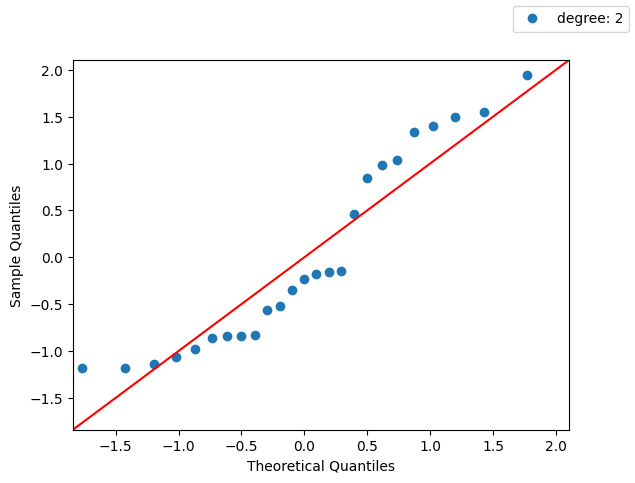

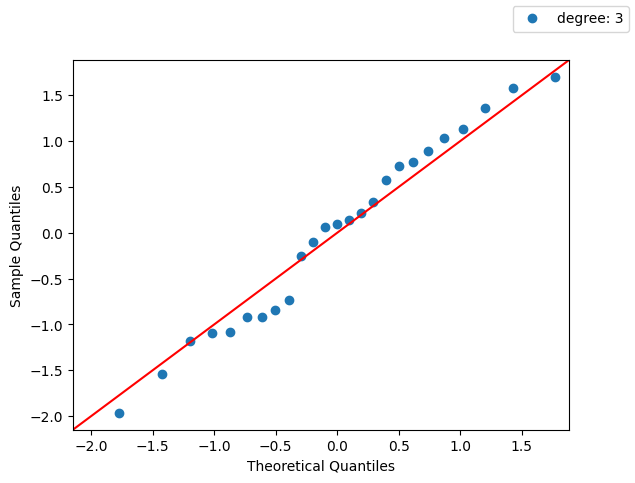

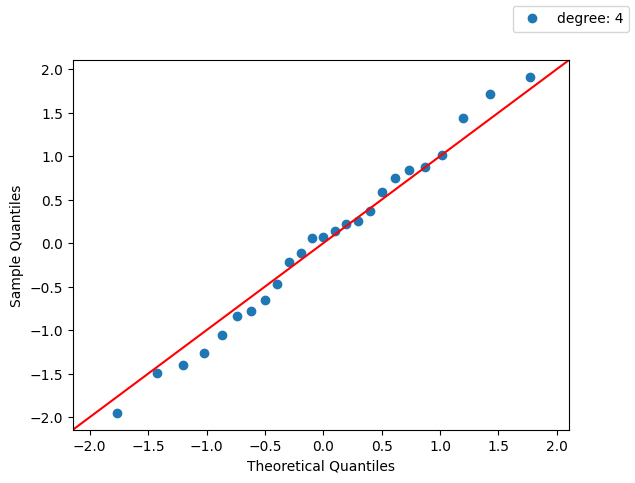

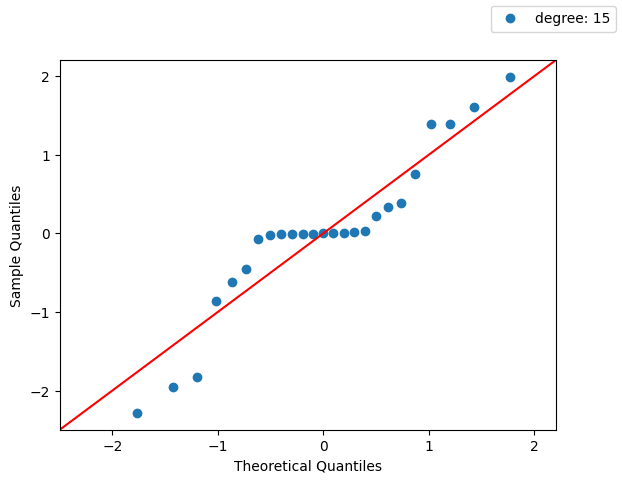

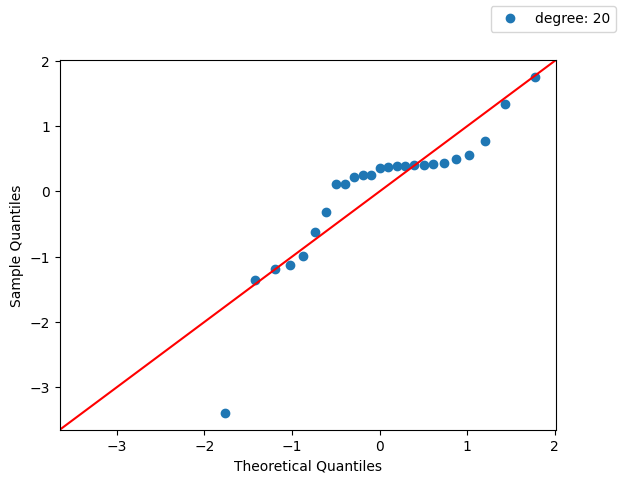

In [10]:
# qqplot
for i, degree in enumerate(degrees):
    fig = sm.qqplot(models_residuals[i], line='45', fit=True, label=f'degree: {degree}')
    fig.legend()
    plt.show(fig)



